## Linear advection

$$ \phi_j^{n+1} = \phi_j^{n-1} - c(\phi_{j+1}^n - \phi_{j-1}^n)$$
$$ c = {u {\Delta t \over \Delta x}}$$

The CTCS scheme is conditionally stable with CFL condition
$$ |c| = |u| {\Delta t \over \Delta x} \leq 1$$

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
# Initialization
u = 0.42
dx = 0.25
dt = 0.15

# Define distribution function
# def funcAdvec_testFilter_1(x):
#     """Distribution in space"""
#     y = [0]*len(x)
#     for i in range(0, len(x)):
#         if x[i] < 20 or x[i] > 40:
#             y[i] = 0
#         else:
#             y[i] = 1
#     return y

# Define distribution function
def funcAdvec_testFilter_2(x):
    """Distribution in space"""
    y = [0]*len(x)
    for i in range(0, len(x)):
        if x[i] < 500 or x[i] > 600:
            y[i] = 0
        else:
            y[i] = -np.cos(np.pi*(x[i]-400)/200)
    return y



# # Define distribution function
# def funcAdvec(x):
#     """Distribution in space"""
#     y = [0]*len(x)
#     for i in range(0, len(x)):
#         if x[i] < 400 or x[i] > 600:
#             y[i] = 0
#         elif(x[i] < 500):
#             y[i] = 2
#         else:
#             y[i] = 1
#     return y


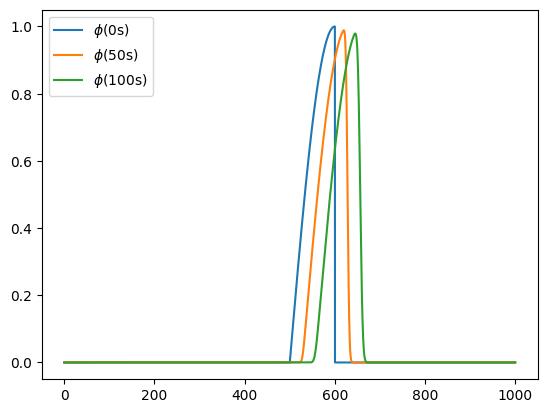

In [60]:
# Evolution of system in time
class differentialSolve:
    def __init__(self, u, dt, dx, x, y) -> None:
        self.c = u*dt/dx
        self.dt = dt
        self.u = u
        self.x = np.array(x)
        self.y = np.array(y)
        self.sz = len(x)
        self.y1 = [0]*self.sz
        self.y2 = [0]*self.sz

    def ftbs(self):
        for i in range(0, self.sz):
            self.y[i] = (1-self.c)*self.y[i] + self.c*self.y[i-1]
    
    def ftfs(self):
        for i in range(0, self.sz-1):
            self.y1[i] = (1+self.c)*self.y[i] - self.c*self.y[i+1]
        self.y1[self.sz-1] = (1+self.c)*self.y[self.sz-1] - self.c*self.y[0]

    def ctcs(self):
        for i in range(0, self.sz-1):
            self.y2[i] = self.y[i] - self.c*(self.y1[i+1] - self.y1[i-1])
        self.y2[self.sz-1] = self.y[self.sz-1] - self.c*(self.y1[0] - self.y1[self.sz-2])

    def show(self):
        plt.plot(self.x,self.y, label="$\phi$(0s)")
        t = 0
        tpoint = 100
        # if self.u > 0:
        #     self.ftbs()
        # else:
        #     self.ftfs()
        # plt.plot(self.x, self.y1)

        while t < tpoint:
            t = t + dt
            self.ftbs()
            # self.y = self.y1
            if np.mod(t, 50) < dt:
                plt.plot(self.x, self.y, label="$\phi$("+str(math.floor(t))+"s)")
        plt.legend(loc="upper left")
        plt.show()

x = np.arange(0, 1000, dx).tolist()
y = funcAdvec_testFilter_2(x)
evolution = differentialSolve(u, dt, dx, x, y)
# evolution.ctcs()
evolution.show()



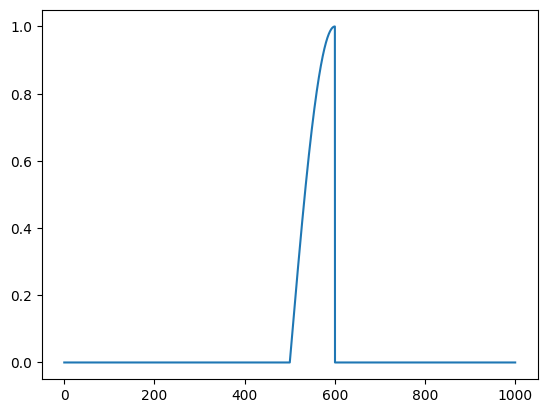

In [48]:
x = np.arange(0, 100, dx).tolist()
y = funcAdvec_testFilter_1(x)

x = np.arange(0, 1000, dx).tolist()
y = funcAdvec_testFilter_2(x)

plt.plot(x,y)

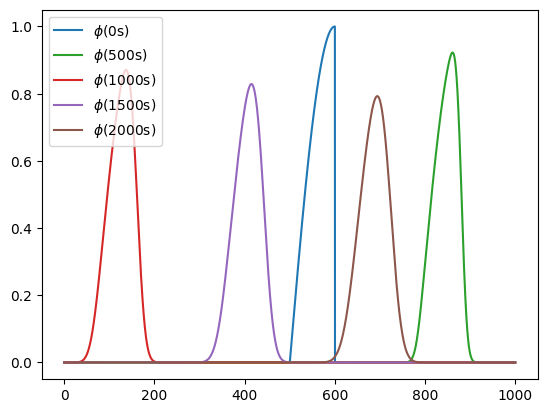

In [49]:

evolution = differentialSolve(u, dt, dx, x, y)
# evolution.ctcs()
evolution.show()

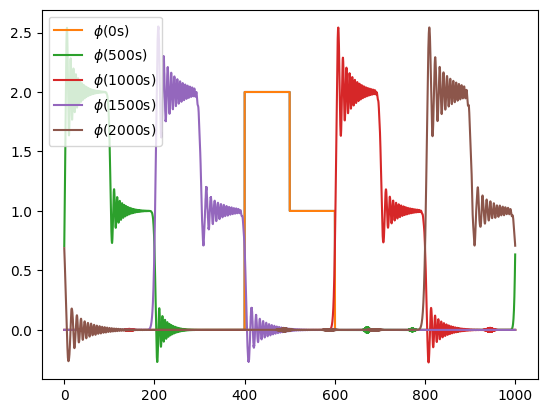

In [11]:


x = np.arange(0, 1000, dx).tolist()
y = funcAdvec(x)
plt.plot(x,y)
u = -0.40
dx = 0.25
dt = 0.1
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ctcs()
evolution.show()